# Otter populations in california

Project 1

Gail Romer and Mellie Zito

In [11]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

from pandas import read_csv

In [12]:
filename = 'Otterdata.csv'
tables = read_csv(filename, header=0, index_col=0, decimal='M')

,pups,total
1990,214.0,1680.0
1991,241.0,1941.0
1992,291.0,2101.0
1993,217.0,2239.0
1994,283.0,2359.0
1995,282.0,2377.0
1996,315.0,2278.0
1997,310.0,2229.0
1998,159.0,2114.0
1999,232.0,2090.0


In [13]:
pups = tables.pups
total = tables.total

1990    1680.0
1991    1941.0
1992    2101.0
1993    2239.0
1994    2359.0
1995    2377.0
1996    2278.0
1997    2229.0
1998    2114.0
1999    2090.0
2000    2317.0
2001    2161.0
2002    2139.0
2003    2505.0
2004    2825.0
2005    2735.0
2006    2692.0
2007    3026.0
2008    2760.0
2009    2654.0
2010    2719.0
2011       NaN
2012    2865.0
2013    2899.0
2014    2879.0
2015    3193.0
2016    3511.0
Name: total, dtype: float64

In [14]:
def plot_results(total, timeseries, title):
    """Plot the estimates and the model.
    
    total: TimeSeries of population estimates
    timeseries: TimeSeries of simulation results
    title: string
    """
    plot(pups, ':', label='pups')
    plot(total, ':', label='total')
    if len(timeseries):
        plot(timeseries, color='gray', label='model')
    
    decorate(xlabel='Year', 
             ylabel='Otter Population',
             title=title)

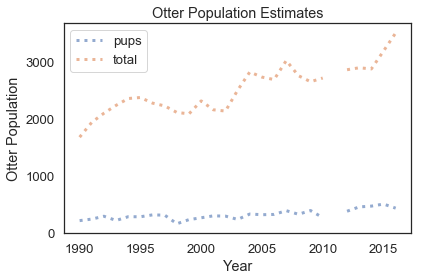

In [15]:
empty = TimeSeries()
plot_results(total, empty, 'Otter Population Estimates')

### How would total otter population increase and decrease if otter pup populations were less consistent year to year?

[To remove later:

Parameters: birth and death rates of otters in california

State (from online data table): populations of otter pups and total otters

Metrics: pup and total otter population]

[Description here of question and what's wanted]

### Model

In [22]:
init_pups = get_first_value(pups)
init_total = get_first_value(total)
init_mature = init_total - init_pups
state = State(total_otters=init_total, pups=init_pups, mature=init_mature)

,values
total_otters,1680.0
pups,214.0
mature,1466.0


In [23]:
system = System(birth_rate = .05,
                maturation_rate = .03,
                death_rate = .02,
                t_0 = 1990,
                t_end = 2015,
                pups = init_pups,
                mature = init_mature,
                total = init_total)

,values
birth_rate,0.05
maturation_rate,0.03
death_rate,0.02
t_0,1990.00
t_end,2015.00
pups,214.00
mature,1466.00
total,1680.00


In [24]:
def update_func1(state, t, system):
    
    
    births = system.birth_rate * state.mature
    
    maturlings = system.maturation_rate * state.pups
        
    deaths = system.death_rate * state.mature
    
    otters = state.mature - deaths + maturlings
    
    pups = state.pups + births
    
    total = otters + pups
    
    return state(pups=pups, mature=otters, total=total)

### Results

### Interpretation

### For Later:

In [25]:
state = update_func1(state, system.t_0, system)

TypeError: 'State' object is not callable

In [21]:
def run_simulation(system, update_func):
    """Simulate the system using any update function.
    
    init: initial State object
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries
    """
    results = TimeSeries()
    
    state = system.init
     
    
    for t in linrange(system.t_0, system.t_end):
        state = update_func(state, t, system)
        results[t+1] = state.urchins
        
    return results

In [22]:
results = run_simulation(system, update_func1);

AttributeError: 'numpy.float64' object has no attribute 'urchins'

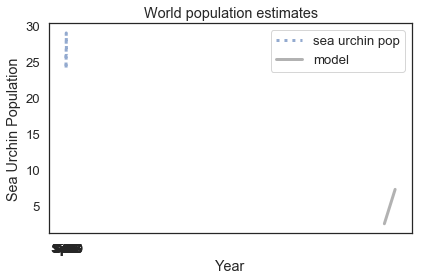

In [124]:
plot_results(total, results, 'World population estimates')

### Copied Code



#### How to take in data tables for birth and death rates and trends, then plot that data



In [48]:
filename = 'data/World_population_estimates.html'
#replace with found data table
tables = read_html(filename, header=0, index_col=0, decimal='M')
table2 = tables[2]
table2.columns = ['census', 'prb', 'un', 'maddison', 
                  'hyde', 'tanton', 'biraben', 'mj', 
                  'thomlinson', 'durand', 'clark']

In [ ]:
def plot_results(census, un, timeseries, title):
    """Plot the estimates and the model.
    
    census: TimeSeries of population estimates
    un: TimeSeries of population estimates
    timeseries: TimeSeries of simulation results
    title: string
    """
    plot(census, ':', label='US Census')
    plot(un, '--', label='UN DESA')
    if len(timeseries):
        plot(timeseries, color='gray', label='model')
    
    decorate(xlabel='Year', 
             ylabel='World population (billion)',
             title=title)

In [ ]:
un = table2.un / 1e9
census = table2.census / 1e9
empty = TimeSeries()
plot_results(census, un, empty, 'World population estimates')

#### Then it goes into making the model:

### System objects

We can rewrite the code from the previous chapter using system objects.

In [ ]:
t_0 = get_first_label(census)
t_end = get_last_label(census)
elapsed_time = t_end - t_0

p_0 = get_first_value(census)
p_end = get_last_value(census)
total_growth = p_end - p_0

annual_growth = total_growth / elapsed_time

system = System(t_0=t_0, 
                t_end=t_end,
                p_0=p_0,
                annual_growth=annual_growth)

And we can encapsulate the code that runs the model in a function.

In [ ]:
def run_simulation1(system):
    """Runs the constant growth model.
    
    system: System object
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in linrange(system.t_0, system.t_end):
        results[t+1] = results[t] + system.annual_growth
    
    return results

We can also encapsulate the code that plots the results.

In [ ]:
def plot_results(census, un, timeseries, title):
    """Plot the estimates and the model.
    
    census: TimeSeries of population estimates
    un: TimeSeries of population estimates
    timeseries: TimeSeries of simulation results
    title: string
    """
    plot(census, ':', label='US Census')
    plot(un, '--', label='UN DESA')
    plot(timeseries, color='gray', label='model')
    
    decorate(xlabel='Year', 
             ylabel='World population (billion)',
             title=title)

In [ ]:
results = run_simulation1(system)
plot_results(census, un, results, 'Constant growth model')

## Proportional model:

In [ ]:
def update_func1(pop, t, system):
    """Compute the population next year.
    
    pop: current population
    t: current year
    system: system object containing parameters of the model
    
    returns: population next year
    """
    #print(t)
    #print(pop)
    births = system.birth_rate * pop
    deaths = system.death_rate * pop
    return pop + births - deaths

In [ ]:
def run_simulation(system, update_func):
    """Simulate the system using any update function.
    
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in linrange(system.t_0, system.t_end):
        results[t+1] = update_func(results[t], t, system)
        
    return results

In [ ]:
t_0 = get_first_label(census)
t_end = get_last_label(census)
p_0 = census[t_0]

system = System(t_0=t_0, 
                t_end=t_end,
                p_0=p_0,
                birth_rate=0.027,
                death_rate=0.01)

In [ ]:
results = run_simulation(system, update_func1)
plot_results(census, un, results, 'Proportional model, factored')

### Combines Birth and Death Rates

In [ ]:
def run_simulation2(system):
    """Run a model with proportional birth and death.
    
    system: System object
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in linrange(system.t_0, system.t_end):
        births = system.birth_rate * results[t]
        deaths = system.death_rate * results[t]
        results[t+1] = results[t] + births - deaths
        
    return results

system.death_rate = 0.01
system.birth_rate = 0.027

results = run_simulation2(system)
plot_results(census, un, results, 'Proportional model')
savefig('figs/chap03-fig03.pdf')

In [ ]:
def update_func2(pop, t, system):
    """Compute the population next year.
    
    pop: current population
    t: current year
    system: system object containing parameters of the model
    
    returns: population next year
    """
    net_growth = system.alpha  * pop
    return pop + net_growth

In [ ]:
system.alpha = system.birth_rate - system.death_rate

results = run_simulation(system, update_func2)
plot_results(census, un, results, 'Proportional model, combined birth and death')

### Multiple rates:

In [ ]:
def update_func3(pop, t, system):
    """Compute the population next year.
    
    pop: current population
    t: current year
    system: system object containing parameters of the model
    
    returns: population next year
    """
    if t < 1980:
        net_growth = system.alpha1  * pop
    
    if t >= 1980:
        net_growth = system.alpha2 * pop
        
    return pop + net_growth

In [ ]:
system.death_rate1 = 0.01
system.birth_rate1 = 0.027

system.death_rate2 = 0.01
system.birth_rate2 = 0.028

system.alpha1 = system.birth_rate1 - system.death_rate1
system.alpha2 = system.birth_rate2 - system.death_rate2

results = run_simulation(system, update_func3)
plot_results(census, un, results, 'Proportional model, combined birth and death')